In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
# Load dataset
df = pd.read_csv("../projectmi/Admission_Predict.csv")
# Display the first few rows
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Display the summary statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# Rename columns to remove trailing spaces
df.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)


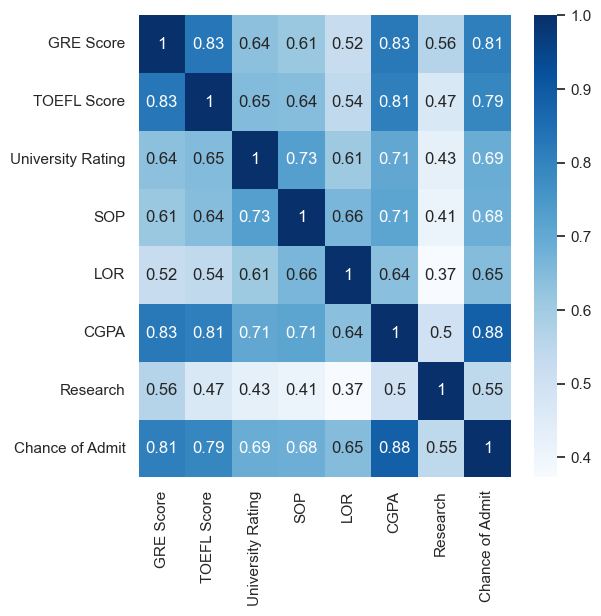

In [5]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=ax)
plt.show()

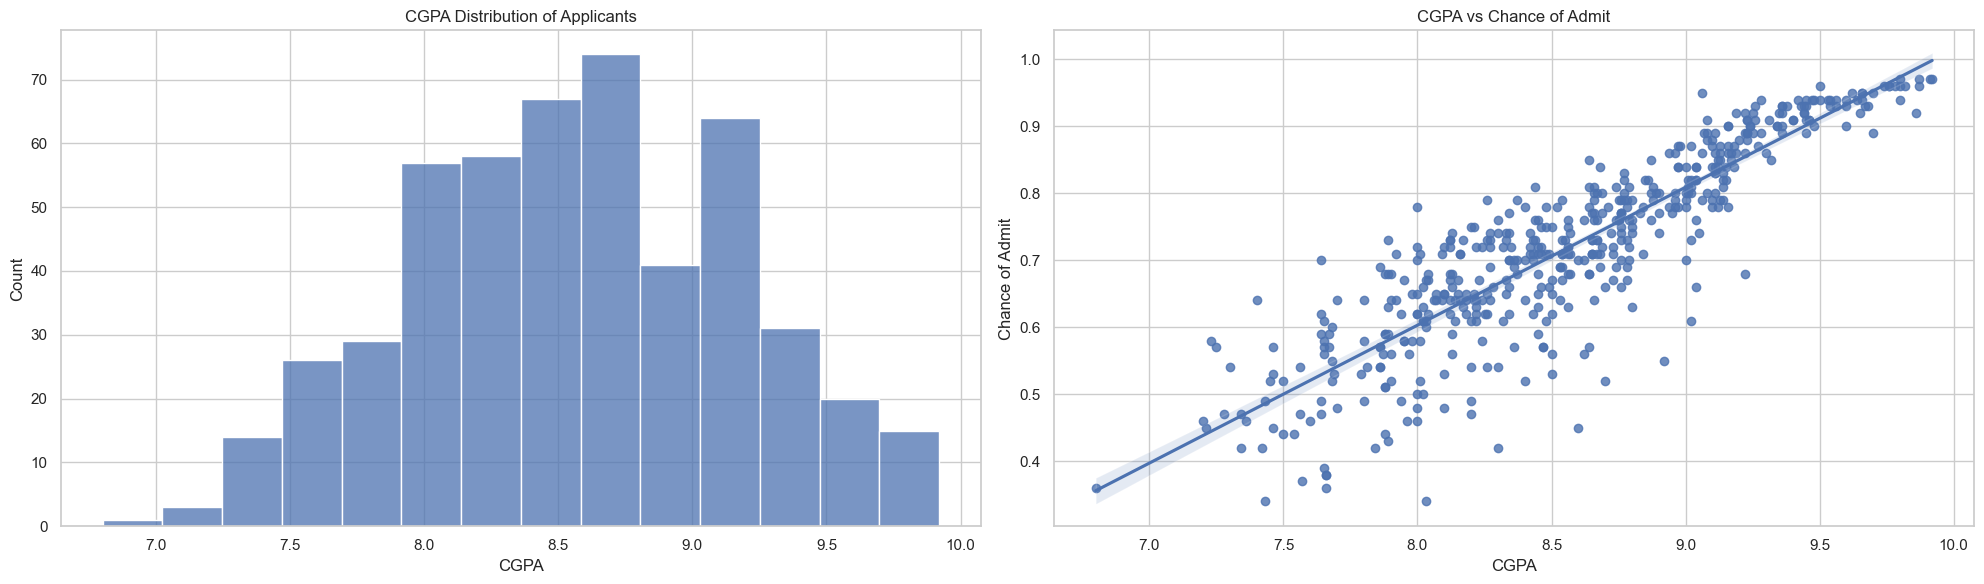

In [6]:
# CGPA distribution and relation to Chance of Admit
plt.figure(figsize=(20, 6))

# First subplot: CGPA distribution
plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

# Second subplot: CGPA vs Chance of Admit
plt.subplot(1, 2, 2)
sns.regplot(x='CGPA', y='Chance of Admit', data=df)
plt.title('CGPA vs Chance of Admit')

plt.tight_layout()
plt.show()

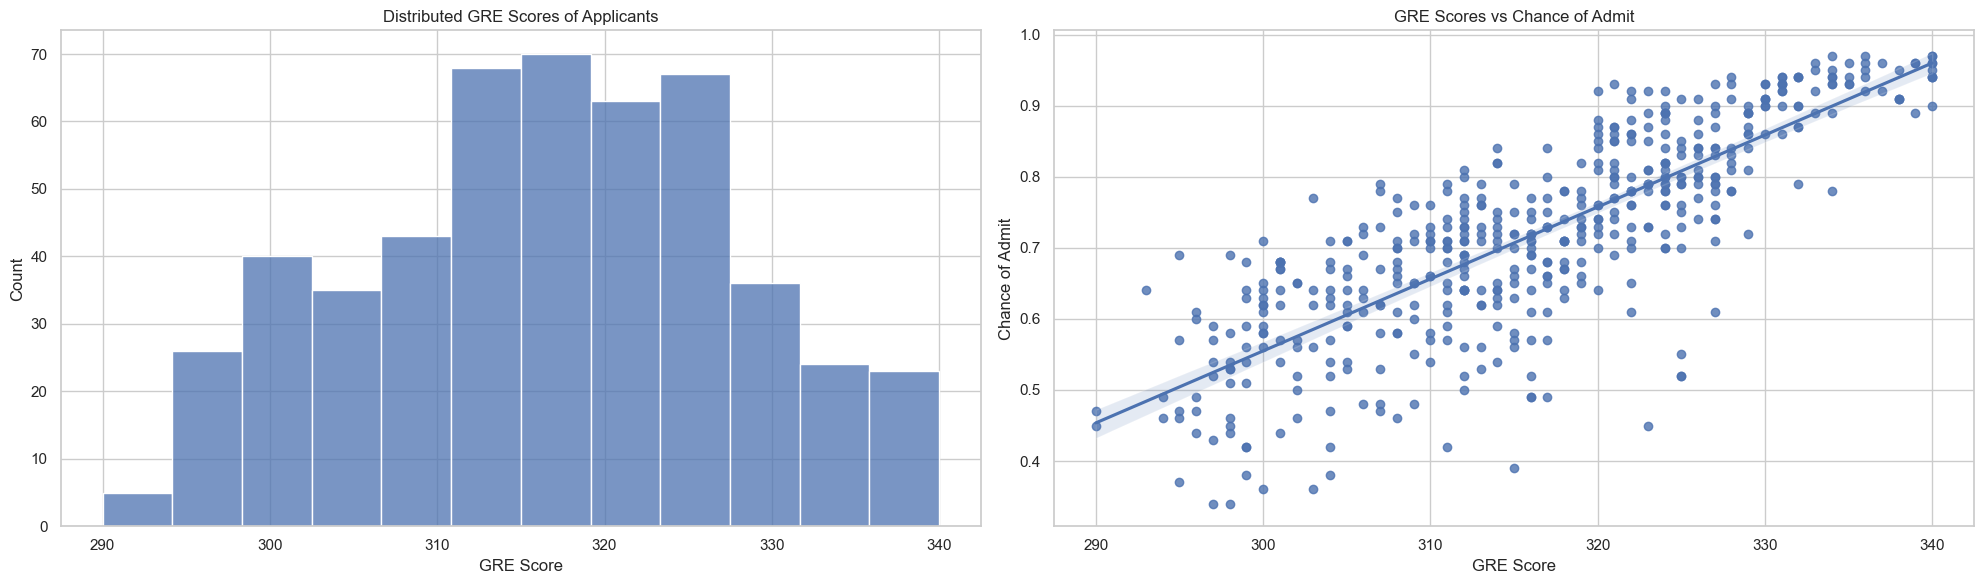

In [7]:
# GRE Scores distribution and relation to Chance of Admit
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1, 2, 2)
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)
plt.title('GRE Scores vs Chance of Admit')

plt.tight_layout()
plt.show()

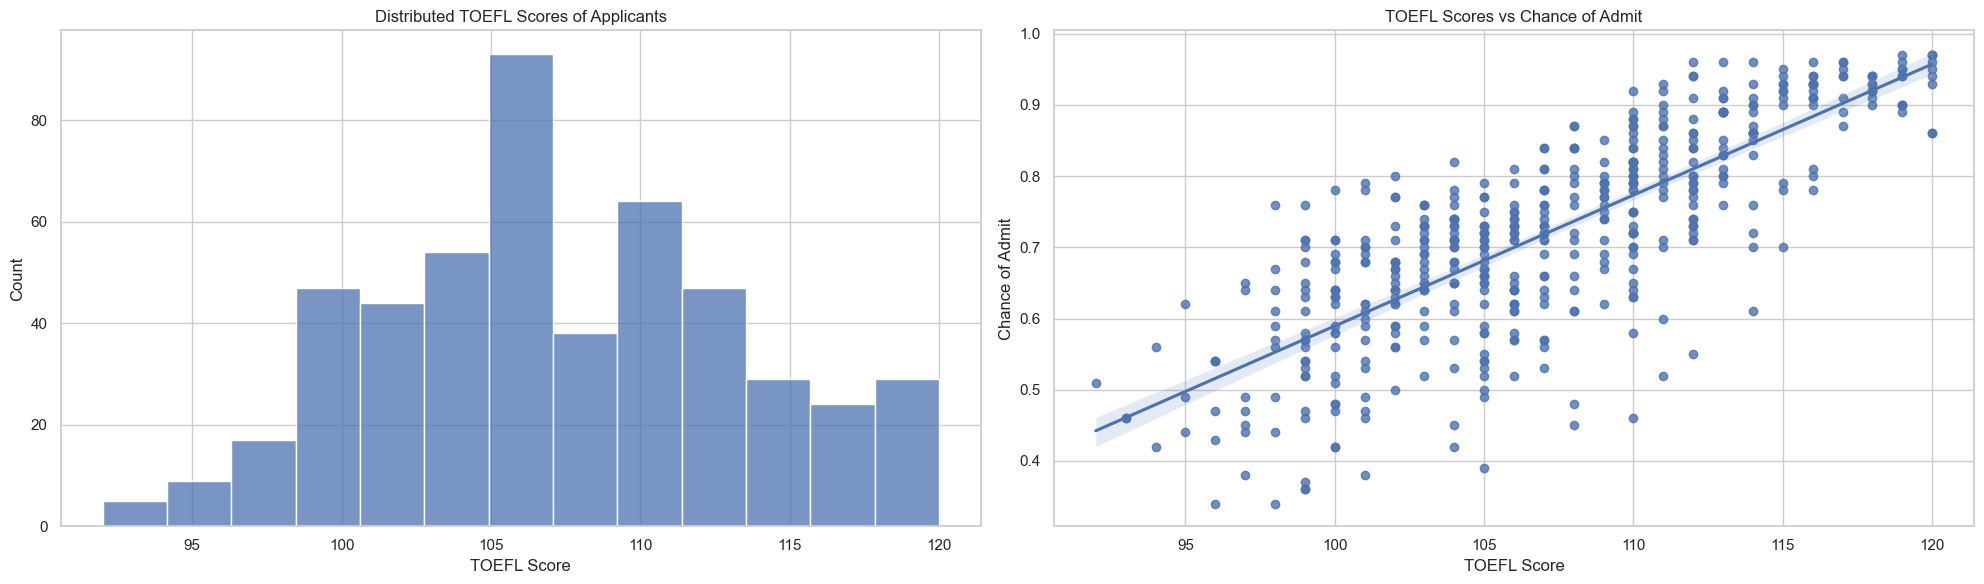

In [8]:
# TOEFL Scores distribution and relation to Chance of Admit
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1, 2, 2)
sns.regplot(x='TOEFL Score', y='Chance of Admit', data=df)
plt.title('TOEFL Scores vs Chance of Admit')

plt.tight_layout()
plt.show()

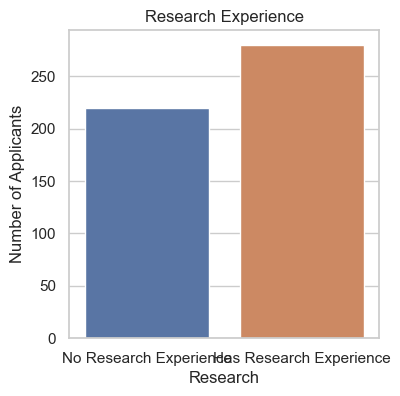

In [9]:
# University rating count plot
fig, ax = plt.subplots(figsize=(4,4))
sns.countplot(x='Research', data=df, ax=ax)
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])
plt.show()

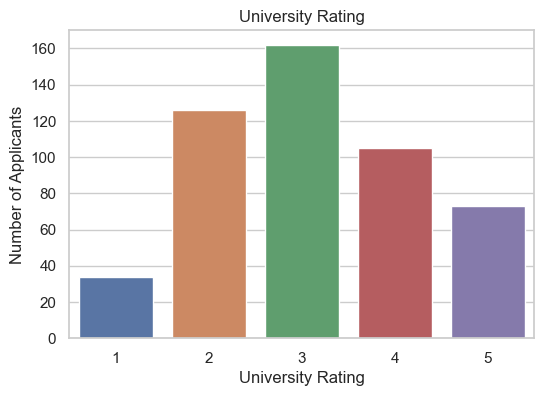

In [10]:
#University distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='University Rating', data=df, ax=ax)
plt.title('University Rating')
plt.ylabel('Number of Applicants')
plt.xlabel('University Rating')
plt.show()

In [11]:
# Prepare features and target variable
targets = df['Chance of Admit']
features = df.drop(columns={'Chance of Admit'})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [12]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform instead of fit_transform on test data

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict_linreg = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

81.88432567829628

In [14]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict_dec_tree = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

66.91385961398366

In [15]:
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict_forest = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

78.86586410639183

In [16]:
# Support Vector Machine Regressor
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)
svm_score = svm.score(X_test, y_test) * 100
svm_score

75.89384637350621

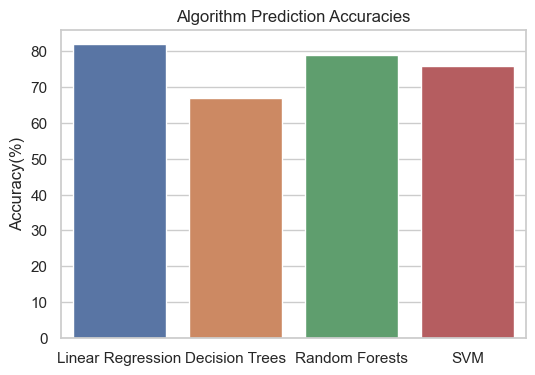

In [17]:

# Plot model accuracies
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests', 'SVM']
Scores = np.array([linreg_score, dec_tree_score, forest_score, svm_score])

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=Methods, y=Scores, ax=ax)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy(%)')
plt.show()


In [18]:
# Calculate KPIs for each model
models = {
    'Linear Regression': y_predict_linreg,
    'Decision Tree': y_predict_dec_tree,
    'Random Forest': y_predict_forest,
    'SVM': y_predict_svm
}

In [19]:
# Store KPI values
mae_scores = []
mse_scores = []
r2_scores = []

for name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"{name}:\n  MAE: {mae}\n  MSE: {mse}\n  R^2: {r2}\n")

Linear Regression:
  MAE: 0.04272265427705369
  MSE: 0.0037046553987884127
  R^2: 0.8188432567829628

Decision Tree:
  MAE: 0.05503252461590697
  MSE: 0.0067661157089403436
  R^2: 0.6691385961398366

Random Forest:
  MAE: 0.04442820942641016
  MSE: 0.004321930790242872
  R^2: 0.7886586410639183

SVM:
  MAE: 0.05636026913774031
  MSE: 0.004929708416617981
  R^2: 0.7589384637350621



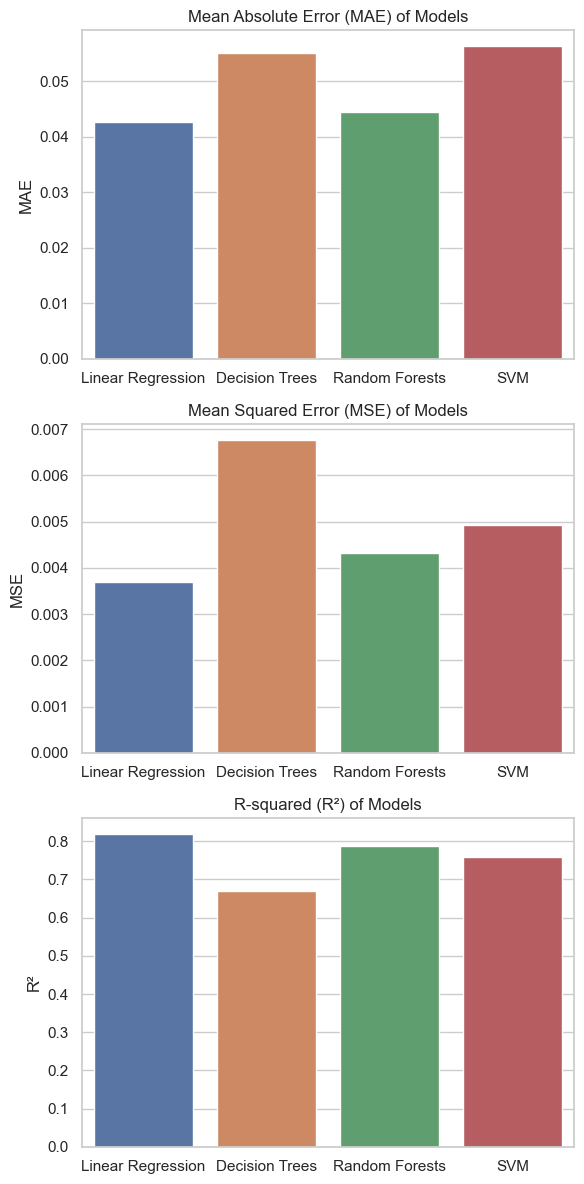

In [20]:
# Plot KPI values
fig, ax = plt.subplots(3, 1, figsize=(6,12))

# MAE plot
sns.barplot(x=Methods, y=mae_scores, ax=ax[0])
ax[0].set_title('Mean Absolute Error (MAE) of Models')
ax[0].set_ylabel('MAE')

# MSE plot
sns.barplot(x=Methods, y=mse_scores, ax=ax[1])
ax[1].set_title('Mean Squared Error (MSE) of Models')
ax[1].set_ylabel('MSE')

# R^2 plot
sns.barplot(x=Methods, y=r2_scores, ax=ax[2])
ax[2].set_title('R-squared (R²) of Models')
ax[2].set_ylabel('R²')

plt.tight_layout()
plt.show()